In [ ]:
!jupyter nbconvert --to html /content/Boosting_Hyper_Parameter_Tuning_and_EDA_done_for_Shooting.ipynb

<a name="Contents"></a>

# **Boosting, Hyper Parameter Tuning and EDA done for Shooting**

CONTENTS:

1. [Importing libraries for EDA](#EDA)
2. [Importing Dataset from Drive](#Dataset)
3. [Checking null values in dataframe and info()](#isnull)
4. [HeatMap of B2 District for Shooting cases](#Viz)
5. [Adding 4 New Columns](#Columns)
6. [Modelling with AdaBoost](#AdaBoost)
7. [Over-Sampling with SMOTE ENN(**Edited Nearest Neighbours**)](#SMOTEENN)
8. [Hyperparameter Tuning](#Tuning)

In [1]:
#Library for Data Manipulation and working with Dataframes
import pandas as pd 
# Library to work with numerical values with ease
import numpy as np  
# Library for Data Visualization - Seaborn
import seaborn as sns
# Library for Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
# Library, a runtime configuration (rc) containing the default styles for every plot element
from pylab import rcParams
# Another Library for Data Visualization
import folium
from folium.plugins import HeatMap
import pandas_profiling
# Library for encoding categorical features
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
rcParams["figure.figsize"] = 20,9
warnings.filterwarnings("ignore")

#!jupyter nbconvert --to html /content/Crime_Dataset_EDA.ipynb 
#--> this code is for downloading it into html format

<a name="Dataset"></a>
#### Importing Dataset from Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cleaner_crime_data.csv', index_col = 0)

Mounted at /content/drive


In [ ]:
df.head()

,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long
0,2629,HARASSMENT,C11,397,0,2015,6,1,0,MELBOURNE ST,42.291093,-71.065945
2,3201,PROPERTY - LOST,B3,433,0,2015,6,1,0,NORFOLK ST,42.283634,-71.082813
3,3115,INVESTIGATE PERSON,A7,20,0,2015,6,1,0,PARIS ST,42.377023,-71.032247
4,2647,THREATS TO DO BODILY HARM,C11,359,0,2015,6,1,0,WASHINGTON ST,42.293606,-71.071887
5,3201,PROPERTY - LOST,B2,282,0,2015,6,1,0,WASHINGTON ST,42.328663,-71.085634


[Back to **Contents**](#Contents)
<a name="isnull"></a>

#### Checking for Null Values and also looking at other information of the dataset, along with dropping duplicates and resetting the index.
  - Will also drop a column called **REPORTING_AREA**

In [ ]:
print(df.isna().sum(), df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619051 entries, 0 to 1938
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   OFFENSE_CODE         619051 non-null  int64  
 1   OFFENSE_DESCRIPTION  619051 non-null  object 
 2   DISTRICT             619051 non-null  object 
 3   REPORTING_AREA       619051 non-null  object 
 4   SHOOTING             619051 non-null  int64  
 5   YEAR                 619051 non-null  int64  
 6   MONTH                619051 non-null  int64  
 7   DAY_OF_WEEK          619051 non-null  int64  
 8   HOUR                 619051 non-null  int64  
 9   STREET               619051 non-null  object 
 10  Lat                  619051 non-null  float64
 11  Long                 619051 non-null  float64
dtypes: float64(2), int64(6), object(4)
memory usage: 61.4+ MB
OFFENSE_CODE           0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
SHOOTING      

In [ ]:
# Return dataframe with Duplicate rows removed
df.drop_duplicates()

,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long
0,2629,HARASSMENT,C11,397,0,2015,6,1,0,MELBOURNE ST,42.291093,-71.065945
2,3201,PROPERTY - LOST,B3,433,0,2015,6,1,0,NORFOLK ST,42.283634,-71.082813
3,3115,INVESTIGATE PERSON,A7,20,0,2015,6,1,0,PARIS ST,42.377023,-71.032247
4,2647,THREATS TO DO BODILY HARM,C11,359,0,2015,6,1,0,WASHINGTON ST,42.293606,-71.071887
5,3201,PROPERTY - LOST,B2,282,0,2015,6,1,0,WASHINGTON ST,42.328663,-71.085634
...,...,...,...,...,...,...,...,...,...,...,...,...
1934,3114,INVESTIGATE PROPERTY,A15,,0,2023,1,4,1,HIGH ST & SULLIVAN ST\nCHARLESTOWN MA 02129\n...,42.378348,-71.066216
1935,2907,VAL - OPERATING AFTER REV/SUSP.,B2,,0,2023,1,4,1,COLUMBIA RD & DUDLEY ST\nDORCHESTER MA 02125\...,42.317053,-71.065214
1936,2905,VAL - VIOLATION OF AUTO LAW,C11,340,0,2023,1,4,2,JULIETTE ST & FOX ST\nBOSTON MA 02122\nUNITED...,42.306510,-71.062930
1937,1831,SICK ASSIST,A15,57,0,2023,1,4,2,MONUMENT AVE,42.374908,-71.061710


In [ ]:
# Reset the index or a level
df.reset_index(drop=True)

,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long
0,2629,HARASSMENT,C11,397,0,2015,6,1,0,MELBOURNE ST,42.291093,-71.065945
1,3201,PROPERTY - LOST,B3,433,0,2015,6,1,0,NORFOLK ST,42.283634,-71.082813
2,3115,INVESTIGATE PERSON,A7,20,0,2015,6,1,0,PARIS ST,42.377023,-71.032247
3,2647,THREATS TO DO BODILY HARM,C11,359,0,2015,6,1,0,WASHINGTON ST,42.293606,-71.071887
4,3201,PROPERTY - LOST,B2,282,0,2015,6,1,0,WASHINGTON ST,42.328663,-71.085634
...,...,...,...,...,...,...,...,...,...,...,...,...
619046,3114,INVESTIGATE PROPERTY,A15,,0,2023,1,4,1,HIGH ST & SULLIVAN ST\nCHARLESTOWN MA 02129\n...,42.378348,-71.066216
619047,2907,VAL - OPERATING AFTER REV/SUSP.,B2,,0,2023,1,4,1,COLUMBIA RD & DUDLEY ST\nDORCHESTER MA 02125\...,42.317053,-71.065214
619048,2905,VAL - VIOLATION OF AUTO LAW,C11,340,0,2023,1,4,2,JULIETTE ST & FOX ST\nBOSTON MA 02122\nUNITED...,42.306510,-71.062930
619049,1831,SICK ASSIST,A15,57,0,2023,1,4,2,MONUMENT AVE,42.374908,-71.061710


In [ ]:
df.drop('REPORTING_AREA', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619051 entries, 0 to 1938
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   OFFENSE_CODE         619051 non-null  int64  
 1   OFFENSE_DESCRIPTION  619051 non-null  object 
 2   DISTRICT             619051 non-null  object 
 3   SHOOTING             619051 non-null  int64  
 4   YEAR                 619051 non-null  int64  
 5   MONTH                619051 non-null  int64  
 6   DAY_OF_WEEK          619051 non-null  int64  
 7   HOUR                 619051 non-null  int64  
 8   STREET               619051 non-null  object 
 9   Lat                  619051 non-null  float64
 10  Long                 619051 non-null  float64
dtypes: float64(2), int64(6), object(3)
memory usage: 56.7+ MB


<a name="Viz"></a>
#### Data Visualization for District wise crime rates.
[Back to **Contents**](#Contents)

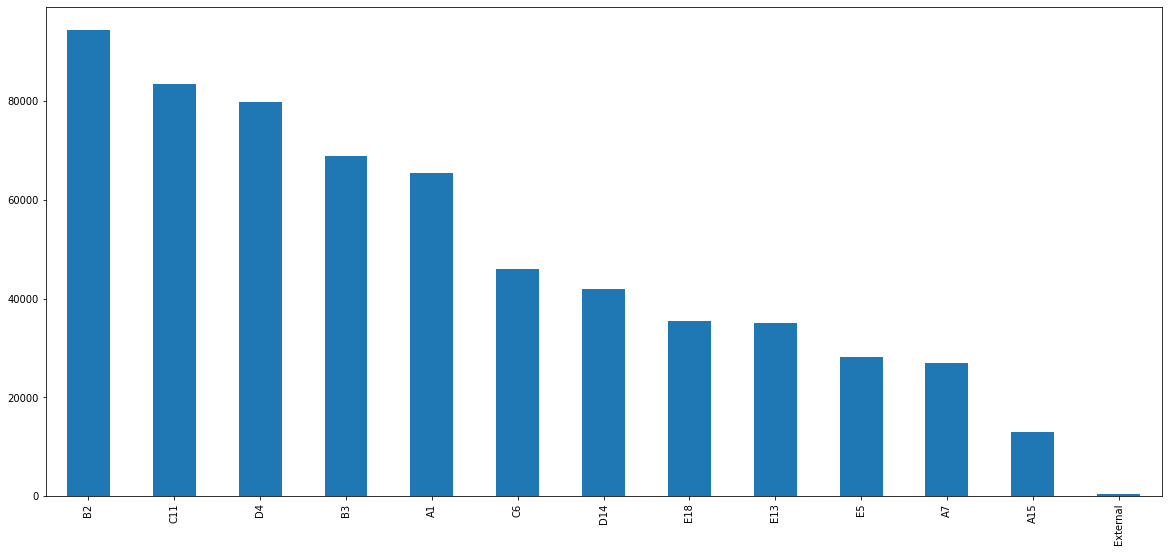

In [ ]:
fig, ax = plt.subplots()
df['DISTRICT'].value_counts().plot(ax=ax, kind='bar')

![Image from Boston Police Department](https://i0.wp.com/liveboston617.org/wp-content/uploads/2020/11/7300d79ca2fed818119719fba67d9a50-police-district-boston.jpg?w=574&ssl=1)

In [ ]:
B2_district=df.loc[df.DISTRICT=='B2'][['Lat','Long']]
B2_district.Lat.fillna(0, inplace = True)
B2_district.Long.fillna(0, inplace = True) 

map_1=folium.Map(location=[42.356145,-71.064083], 
                 tiles = "OpenStreetMap",
                zoom_start=11)

folium.CircleMarker([42.319945,-71.079989],
                        radius=90,
                        fill_color="#b22222",
                        popup='Shooting',
                        color='red',
                       ).add_to(map_1)


HeatMap(data=B2_district, radius=18).add_to(map_1)

map_1

In [ ]:
df.head()

,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long
0,2629,HARASSMENT,C11,0,2015,6,1,0,MELBOURNE ST,42.291093,-71.065945
2,3201,PROPERTY - LOST,B3,0,2015,6,1,0,NORFOLK ST,42.283634,-71.082813
3,3115,INVESTIGATE PERSON,A7,0,2015,6,1,0,PARIS ST,42.377023,-71.032247
4,2647,THREATS TO DO BODILY HARM,C11,0,2015,6,1,0,WASHINGTON ST,42.293606,-71.071887
5,3201,PROPERTY - LOST,B2,0,2015,6,1,0,WASHINGTON ST,42.328663,-71.085634


<a name="Columns"></a>
#### Adding 4 new Columns:

  - Murder: 'Yes' if there was any murder or 'No' if none.
  - Fire_Related: 'Yes' if there was any fire or 'No' if none.
  - Criticallity_Level: High Criticality value means gruesome crime committed.
  - Response_Flag: Shows only the responses to a crime(OFFENSE_CODE list have only the responses for any crime/incident).

  
[Back to **Contents**](#Contents)

In [ ]:
df.loc[df['OFFENSE_DESCRIPTION'].str.contains("MURDER", regex = False), "Murder_Involved"] = 'Yes'
df.loc[~df['OFFENSE_DESCRIPTION'].str.contains("MURDER", regex = False), "Murder_Involved"] = 'No'


df.loc[df['OFFENSE_DESCRIPTION'].str.contains("FIRE", regex = False), "Fire_Related"] = 'Yes'
df.loc[~df['OFFENSE_DESCRIPTION'].str.contains("FIRE", regex = False), "Fire_Related"] = 'No'

df['Criticality_Level'] = 1
df.loc[df['OFFENSE_DESCRIPTION'].str.contains("MURDER", regex = False), "Criticality_Level"] = 5
df.loc[df['OFFENSE_DESCRIPTION'].str.contains("FIRE", regex = False), "Criticality_Level"] = 5
df.loc[df['OFFENSE_DESCRIPTION'].str.contains("DRUGS", regex = False), "Criticality_Level"] = 2
df.loc[df['OFFENSE_DESCRIPTION'].str.contains("VANDALISM", regex = False), "Criticality_Level"] = 4
df.loc[df['OFFENSE_DESCRIPTION'].str.contains("DEATH", regex = False), "Criticality_Level"] = 5
df.loc[df['OFFENSE_DESCRIPTION'].str.contains("ROBBERY", regex = False), "Criticality_Level"] = 3
df.loc[df['OFFENSE_DESCRIPTION'].str.contains("WEAPON", regex = False), "Criticality_Level"] = 4
df.loc[df['OFFENSE_DESCRIPTION'].str.contains("BOMB", regex = False), "Criticality_Level"] = 5

print(df.Murder_Involved.unique())
print(df.Fire_Related.unique())
print(df.Criticality_Level.unique())


['No' 'Yes']
['No' 'Yes']
[1 2 4 5 3]


In [ ]:
response_list = [3115, 3130, 3018, 3006, 2917, 3410, 
                 3125, 3304, 3130, 1723, 3114, 3811, 
                 3820, 3821, 3712, 3701, 3702, 3704, 
                 3106, 3709, 3810, 3801, 3802, 3803, 
                 3805, 3807, 3207, 2662, 3123, 3119,
                 3502, 3503, 3202, 3204, 3206, 3109, 
                 3110, 3112, 3412, 2665, 3408, 1304, 
                 735, 770, 780, 790, 670, 701, 702, 
                 711, 712, 713, 715]

In [ ]:
df['Response_Flag'] = 'N'
df['Response_Flag'] = df.apply(lambda x: 'Y' if x['OFFENSE_CODE'] in response_list else 'N',axis=1)

In [ ]:
df.isna().sum()

OFFENSE_CODE           0
OFFENSE_DESCRIPTION    0
DISTRICT               0
SHOOTING               0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
STREET                 0
Lat                    0
Long                   0
Murder_Involved        0
Fire_Related           0
Criticality_Level      0
Response_Flag          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619051 entries, 0 to 1938
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   OFFENSE_CODE         619051 non-null  int64  
 1   OFFENSE_DESCRIPTION  619051 non-null  object 
 2   DISTRICT             619051 non-null  object 
 3   SHOOTING             619051 non-null  int64  
 4   YEAR                 619051 non-null  int64  
 5   MONTH                619051 non-null  int64  
 6   DAY_OF_WEEK          619051 non-null  int64  
 7   HOUR                 619051 non-null  int64  
 8   STREET               619051 non-null  object 
 9   Lat                  619051 non-null  float64
 10  Long                 619051 non-null  float64
 11  Murder_Involved      619051 non-null  object 
 12  Fire_Related         619051 non-null  object 
 13  Criticality_Level    619051 non-null  int64  
 14  Response_Flag        619051 non-null  object 
dtypes: float64(2), int6

<a name="AdaBoost"></a>
## Modeling with AdaBoost
#### First I will train it with **imbalance** dataset and then I will train it on **balanced** dataset with testing accuracy. Will also do `Hyper-parameter Tuning`.
- AdaBoost (Adaptive Boosting) is an ensemble learning method for classification and regression problems in machine learning. It combines multiple weak learners (such as decision trees with a small depth) to form a strong model that makes accurate predictions on unseen data. The algorithm adjusts the weights of the training instances at each iteration to give more importance to the misclassified samples, thus increasing the focus of the weak learners on the hard examples in the dataset. In the end, the final prediction is made by combining the outputs of the weak learners, weighted by their performance. AdaBoost is a popular and widely used algorithm, often achieving good results in practice, especially when used with decision trees.

[Back to **Contents**](#Contents)

AdaBoost with Imbalanced Data:

In [ ]:
categorical_columns = ['OFFENSE_DESCRIPTION', 'DISTRICT', 'STREET', 'Murder_Involved', 'Fire_Related', 'Response_Flag', 'OFFENSE_CODE']

In [ ]:
#!pip install category_encoders

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import AdaBoostClassifier
# Hyperparameter tuning
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score
from hyperopt import tpe, STATUS_OK, Trials, hp, fmin, STATUS_OK, space_eval
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
### For below category_encoders, please use this command: '!pip install category_encoders'
import category_encoders as ce
# Standardize the data
from sklearn.preprocessing import StandardScaler
import time
from collections import Counter
from imblearn.pipeline import make_pipeline

In [ ]:
# Train test split
X = df.drop("SHOOTING", axis=1)
y = df["SHOOTING"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
# Check the number of records in training and testing dataset.
print(f'The training dataset has {len(X_train)} records.')
print(f'The testing dataset has {len(X_test)} records.')

The training dataset has 495240 records.
The testing dataset has 123811 records.


In [ ]:
# Target-Encoding

encoder = ce.TargetEncoder(cols=categorical_columns)
X_train_encoded = encoder.fit_transform(X_train, y_train)

In [ ]:

# Initiate scaler for both test and train data

sc = StandardScaler()# Standardize the training dataset
X_train_transformed_imb = pd.DataFrame(sc.fit_transform(X_train),index=X_train.index, columns=X_train.columns)

# Summary statistics after standardization
X_train_transformed_imb.describe().T

In [ ]:
##  IMBALANCED DATASET
#Define model
model_ori=AdaBoostClassifier()
#Define evaluation procedure (here we use Repeated Stratified K-Fold CV)
cv_ori=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#Evaluate model
scoring=['accuracy','precision_macro','recall_macro']
scores_ori = cross_validate(model_ori, X_train_transformed_imb, y_train, scoring=scoring, cv=cv_ori, n_jobs=-1)

# summarize performance
print('Mean Accuracy: %.4f' % np.mean(scores_ori['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores_ori['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores_ori['test_recall_macro']))
print(classification_report(X_train_transformed_imb, y_train))

<a name="SMOTEENN"></a>
#### Oversampling with SMOTE ENN

1. SMOTE (Synthetic Minority Over-sampling Technique) and ENN (Edited Nearest Neighbors) are two oversampling techniques used to balance imbalanced datasets in machine learning.

2. SMOTE works by synthesizing new samples in the feature space that are similar to existing minority class samples. It does this by selecting a minority class sample, and then creating a new sample by interpolating between that sample and one of its nearest neighbors.

3. ENN, on the other hand, is a cleaning method that removes the samples of the majority class that are misclassified as a minority class. It selects the nearest neighbors of each sample in the dataset and removes samples that are misclassified by the majority of their neighbors.

4. Both SMOTE and ENN can be useful for handling imbalanced datasets, where one class has many more samples than the other. However, SMOTE has a tendency to over-generalize, leading to overfitting on the minority class, whereas ENN can remove potentially useful information from the dataset. As such, it is often a good idea to try both techniques and compare the results to determine which is more effective in a specific use case

[Back to **Contents**](#Contents)

In [ ]:
resample=SMOTEENN(sampling_strategy='minority', n_jobs=-1)

# Over sampling on training set:
X_res, y_res = resample.fit_resample(X_train_encoded, y_train)

print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 490387, 0: 483073})


Scaling the Train(resampled data)

In [ ]:

# Initiate scaler for both test and train data

sc = StandardScaler()# Standardize the training dataset
X_train_transformed = pd.DataFrame(sc.fit_transform(X_res),index=X_res.index, columns=X_res.columns)

# Summary statistics after standardization
X_train_transformed.describe().T


,count,mean,std,min,25%,50%,75%,max
OFFENSE_CODE,973460.0,2.359084e-16,1.000001,-0.531836,-0.529761,-0.428420,0.039748,5.538848
OFFENSE_DESCRIPTION,973460.0,6.633465e-17,1.000001,-0.529286,-0.527219,-0.423459,0.040355,5.667115
DISTRICT,973460.0,3.036445e-16,1.000001,-1.596709,-1.175544,0.175241,0.836144,1.394816
YEAR,973460.0,6.872176e-15,1.000001,-1.810762,-0.862652,0.085458,1.033568,1.981678
MONTH,973460.0,-1.318956e-17,1.000001,-1.783029,-0.856392,0.070246,0.688004,1.614641
DAY_OF_WEEK,973460.0,7.106449e-17,1.000001,-1.518065,-1.017560,-0.016549,0.984461,1.484966
HOUR,973460.0,9.923190e-17,1.000001,-1.677772,-0.888584,0.163666,0.821323,1.347448
STREET,973460.0,-6.353177e-17,1.000001,-0.754886,-0.606792,-0.308151,0.215420,7.689366
Lat,973460.0,-1.086115e-13,1.000001,-827.105948,-0.390653,-0.037584,0.370929,2.859918
Long,973460.0,-1.506058e-14,1.000001,-3.504024,-0.122248,0.041413,0.188389,934.289953


Mean Accuracy: 0.9932
Mean Precision: 0.8394
Mean Recall: 0.6246


Training On Balanced Dataset

In [ ]:
# AdaBoost on Resampled data
model_ori=AdaBoostClassifier()
cv_ori=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring=['accuracy','precision_macro','recall_macro']
scores_ori_res = cross_validate(model_ori, X_train_transformed, y_res, scoring=scoring, cv=cv_ori, n_jobs=-1)

In [ ]:
print('Mean Accuracy: %.4f' % np.mean(scores_ori_res['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores_ori_res['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores_ori_res['test_recall_macro']))
#print(classification_report(X_train_transformed, y_res))

Mean Accuracy: 0.9677
Mean Precision: 0.9681
Mean Recall: 0.9676


Run model on TEST Data

In [ ]:
# Encoding Test Data
encoder = ce.TargetEncoder(cols=categorical_columns)
X_test_encoded = encoder.fit_transform(X_test, y_test)

In [ ]:
# Standardized the testing dataset
X_test_transformed = pd.DataFrame(sc.transform(X_test_encoded),index=X_test_encoded.index, columns=X_test_encoded.columns)

In [ ]:
# Run Model
scores_ori_test = cross_validate(model_ori, X_test_transformed, y_test, scoring=scoring, cv=cv_ori, n_jobs=-1)
#print(classification_report(X_test_transformed, y_test))

In [ ]:
print('Mean Accuracy: %.4f' % np.mean(scores_ori_test['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores_ori_test['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores_ori_test['test_recall_macro']))

Mean Accuracy: 0.9935
Mean Precision: 0.8313
Mean Recall: 0.6576


<a name="Tuning"></a>

#### HyperParameter Tuning
Hyperparameter tuning is the process of searching for the best set of hyperparameters for a machine learning model that results in optimal performance on a validation set. For AdaBoost, some common hyperparameters to tune include:

    *n_estimators*: The number of weak learners to use in the ensemble. A larger number of estimators will increase the model's complexity and may lead to overfitting.

    *learning_rate*: Controls the contribution of each weak learner to the final prediction. A smaller learning rate will result in a more complex model that may overfit, while a larger learning rate will result in a simpler model that may underfit.

    *algorithm*: The base learner algorithm to use for the weak learners. The most common choices are decision trees (“SAMME”) and gradient-boosted trees (“SAMME.R”).

    *base_estimator*: The base learner to use for each weak learner. This can be any machine learning algorithm, although decision trees are commonly used.

There are various methods to perform hyperparameter tuning, including Grid Search, Random Search, and Bayesian optimization. Grid Search is a simple and widely used method that involves exhaustively trying all combinations of hyperparameters within a predefined range, while Random Search randomly samples hyperparameters from the same range. Bayesian optimization uses a probabilistic model to guide the search and has been shown to be more efficient than Grid Search and Random Search. The best approach depends on the specific use case, the size of the search space, and the computational resources available.

- In this case I am using **GridSearch**

[Back to **Contents**](#Contents)

In [ ]:
# define the model with default hyperparameters
model = AdaBoostClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 30, 70]
grid['learning_rate'] = [0.01, 0.1, 1.0]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X_train_transformed, y_res)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.970886 using {'learning_rate': 1.0, 'n_estimators': 70}
0.922724 (0.000428) with: {'learning_rate': 0.01, 'n_estimators': 10}
0.923129 (0.000427) with: {'learning_rate': 0.01, 'n_estimators': 30}
0.923129 (0.000427) with: {'learning_rate': 0.01, 'n_estimators': 70}
0.941401 (0.000340) with: {'learning_rate': 0.1, 'n_estimators': 10}
0.952475 (0.000283) with: {'learning_rate': 0.1, 'n_estimators': 30}
0.957031 (0.000343) with: {'learning_rate': 0.1, 'n_estimators': 70}
0.955451 (0.000322) with: {'learning_rate': 1.0, 'n_estimators': 10}
0.963612 (0.000577) with: {'learning_rate': 1.0, 'n_estimators': 30}
0.970886 (0.000393) with: {'learning_rate': 1.0, 'n_estimators': 70}


In [ ]:
# Train the model
model = AdaBoostClassifier(learning_rate=1.0, n_estimators=70)

model.fit(X_train_transformed, y_res)

# Make predictions on the test set
y_pred = model.predict(X_test_transformed)

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [ ]:
# make predictions on the test set
y_score = model.predict_proba(X_test_transformed)[:, 1]

# calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_score)
print('ROC AUC: %.3f' % roc_auc)

# plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)
plt.plot(fpr, tpr, label='Adaboost (AUC = %0.3f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Adaboost ROC Curve')
plt.legend(loc="lower right")
plt.show()



ROC AUC: 0.980
